In [1]:
# import tools

import cv2
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# load battery image

btr = cv2.imread('data/images/sample_image.png')

btr_rgb = cv2.cvtColor(btr,cv2.COLOR_BGR2RGB)
btr_gry = cv2.cvtColor(btr,cv2.COLOR_BGR2GRAY)

wb,hb,cb = btr.shape
btr_blank = np.zeros((wb,hb,cb),np.uint8) 
btr_blank1 = np.zeros_like(btr,np.uint8) # same as above

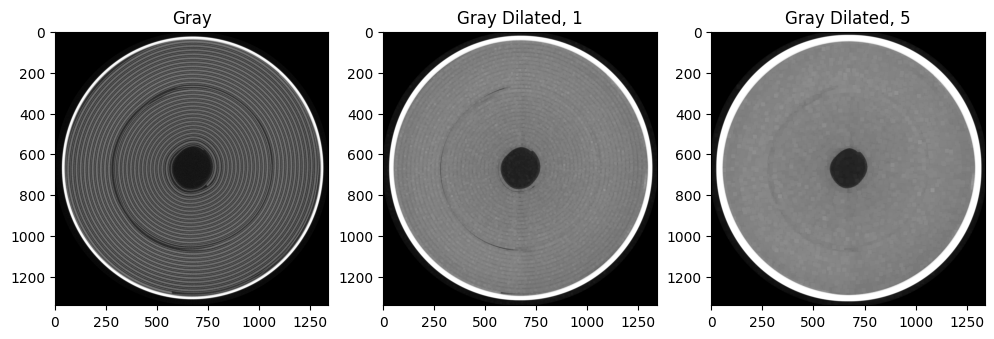

In [3]:
# dilate battery grayscale

kernel = np.ones((10,10),np.uint8)

btr_gry_dlt1 = cv2.dilate(btr_gry, kernel, iterations=1)
btr_gry_dlt2 = cv2.dilate(btr_gry, kernel, iterations=2)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(1,3,2)
plt.title("Gray Dilated, 1")
plt.imshow(btr_gry_dlt1, cmap='gray')

plt.subplot(1,3,3)
plt.title("Gray Dilated, 5")
plt.imshow(btr_gry_dlt2, cmap='gray')

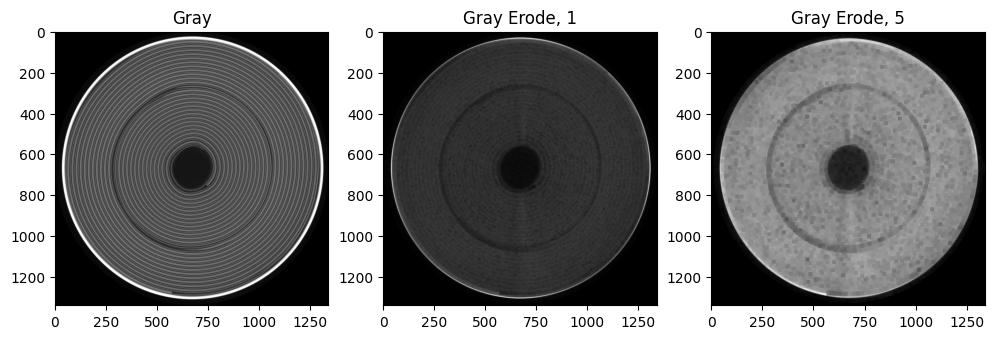

In [4]:
# erode battery grayscale

kernel = np.ones((10,10),np.uint8)

btr_gry_erd1 = cv2.erode(btr_gry, kernel, iterations=1)
btr_gry_erd2 = cv2.erode(btr_gry, kernel, iterations=2)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(1,3,2)
plt.title("Gray Erode, 1")
plt.imshow(btr_gry_erd1, cmap='gray')

plt.subplot(1,3,3)
plt.title("Gray Erode, 5")
plt.imshow(btr_gry_erd2, cmap='gray')

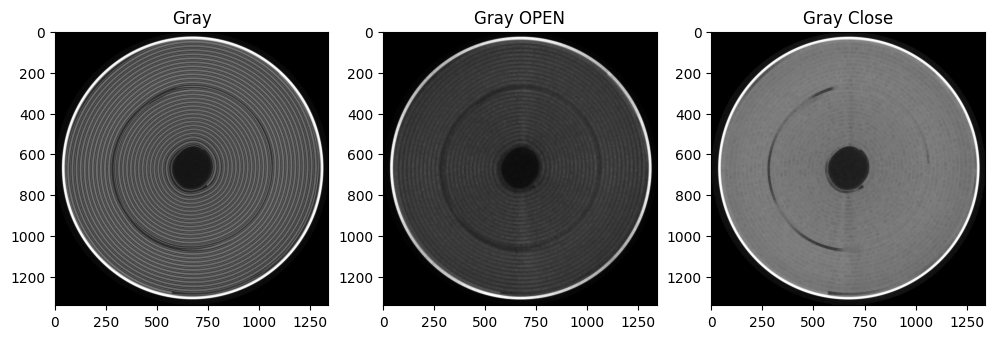

In [5]:
# open and close battery grayscale

kernel = np.ones((10,10),np.uint8)

btr_gry_opn = cv2.morphologyEx(btr_gry, cv2.MORPH_OPEN, kernel)
btr_gry_cls = cv2.morphologyEx(btr_gry, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(1,3,2)
plt.title("Gray OPEN")
plt.imshow(btr_gry_opn, cmap='gray')

plt.subplot(1,3,3)
plt.title("Gray Close")
plt.imshow(btr_gry_cls, cmap='gray')


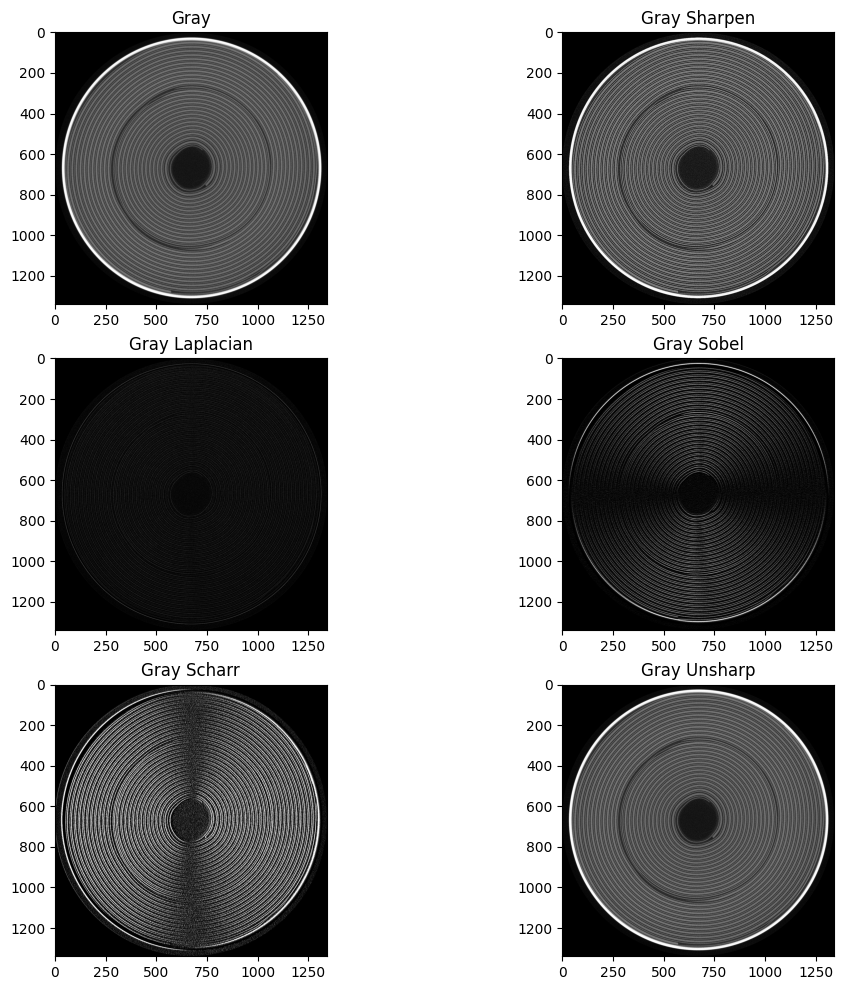

In [6]:
# sharpen images

sharpen_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

btr_gry_shr = cv2.filter2D(btr_gry, -1, sharpen_kernel)

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

btr_gry_lpl = cv2.filter2D(btr_gry, -1, laplacian_kernel)

sobel_kernel = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])

btr_gry_sbl = cv2.filter2D(btr_gry, -1, sobel_kernel)

scharr_kernel = np.array([[-3, 0, 3],
                          [-10, 0, 10],
                          [-3, 0, 3]])

btr_gry_sch = cv2.filter2D(btr_gry, -1, scharr_kernel)

unsharp_mask_kernel = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, -476, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]]) / -256

btr_gry_uns = cv2.filter2D(btr_gry, -1, unsharp_mask_kernel)

plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.title("Gray")
plt.imshow(btr_gry, cmap="gray")

plt.subplot(3,2,2)
plt.title("Gray Sharpen")
plt.imshow(btr_gry_shr, cmap='gray')

plt.subplot(3,2,3)
plt.title("Gray Laplacian")
plt.imshow(btr_gry_lpl, cmap='gray')

plt.subplot(3,2,4)
plt.title("Gray Sobel")
plt.imshow(btr_gry_sbl, cmap='gray')

plt.subplot(3,2,5)
plt.title("Gray Scharr")
plt.imshow(btr_gry_sch, cmap='gray')

plt.subplot(3,2,6)
plt.title("Gray Unsharp")
plt.imshow(btr_gry_uns, cmap='gray')